# napari quick start

## about napari

napari is a fast, interactive, multi-dimensional image viewer, with [a vibrant plugin ecosystem](https://www.napari-hub.org/) that expands its capability to tackle various domain-specific visualization and analysis needs. It is built on Qt (for the GUI), vispy (for performant GPU-based rendering), and the scientific Python stack (numpy, scipy, and scikit-image). 

napari is an open source project on [GitHub](https://github.com/napari/napari) to facilitate transparency, reuse, and extensibility. 

At its core, it provides critical viewer features out-of-the-box, such as support for large multi-dimensional data; provide “layers” to simultaneously visualize images, models, and analysis results; and easy manual, interactive annotation in 3D.

## what's covered here

This tutorial is for napari first-timers to give them a quick glance of what napari does, and give it a try right away. We will cover:

- Installation 
- Open napari
- Open an image
- Image display adjustment
- Manually label the cell
- Make an animation

Along the way, you will see how to access napari functions from [Python code](https://napari.org/api/stable/index.html) and from GUI - though for different purposes, one method might be easier than another. This quick start guide will not cover ALL possible methods but just some ways to perform basic tasks. For the more complete guide, please visit [napari.org](https://napari.org/).

You will also see some examples of plugins. The core napari viewer focuses on domain-agnostic functions such as layer controls. Analyses and domain specific functions, such as reading a special file format and image segmentation, live in the realm of [plugins](https://www.napari-hub.org/).    

** This tutorial uses napari 0.4.13. <br>

### Installation

- For those familiar with Python:

    napari can be installed on most macOS, Linux, and Windows systems with Python 3.7, 3.8, and 3.9 using pip:

```python
pip install 'napari[all]'
```

- Or download the bundled app for simple installation:

    [Linux installation](napari-0.4.13-Linux-x86_64.zip)<br>
    [macOS installaion](napari-0.4.13-macOS-x86_64.zip)<br>
    [Windows installation](napari-0.4.13-Windows-x86_64.zip)<br>

    Note: 0.4.13 bundled app is missing sample menu data ([issue 3968](https://github.com/napari/napari/issues/3968))
    
    Note: for the latest release, please visit [here](https://github.com/napari/napari/releases) and look for Assets.

If you run into any issue, please visit the more detailed [installation guide](https://napari.org/tutorials/fundamentals/installation.html), or report an issue on GitHub!

### Open napari

napari can be opened by [multiple ways](https://napari.org/tutorials/fundamentals/getting_started.html), depending on how its used in your image analysis workflow. 

Here we will be mainly focused on the GUI application.

- From command line: 

    Once installed, simply run    
```python
napari
```

- If you installed the bundled app:

    Click on the app icon to open it.<br>
    *Note: for mac users, it may require [security setting changes](https://napari.org/tutorials/fundamentals/installation.html).*


### Open an image

napari natively supports tiff and many other formats supported by [skimage.io.imread](https://scikit-image.org/docs/dev/api/skimage.io.html) as input image file format.<br>
Try with your own images or download [this ome tiff file](https://downloads.openmicroscopy.org/images/OME-TIFF/2016-06/MitoCheck/00001_01.ome.tiff).

Additional input file formats may be supported [by plugins](https://www.napari-hub.org/). 
Try [napari-aicsimageio](https://www.napari-hub.org/plugins/napari-aicsimageio) if you have czi, lif, or nd2 files.

Once you have the proper plugin installed, use File > Open Files(s)... and select the image file, or simply drag and drop the image into napari. 

For demo purpose, we will use a sample image that comes with napari.

(1) Open napari IPython console
**to do: add image**
    
(2) Type
    
```python
from skimage import data
viewer.add_image(data.cell(), name='cell')
```

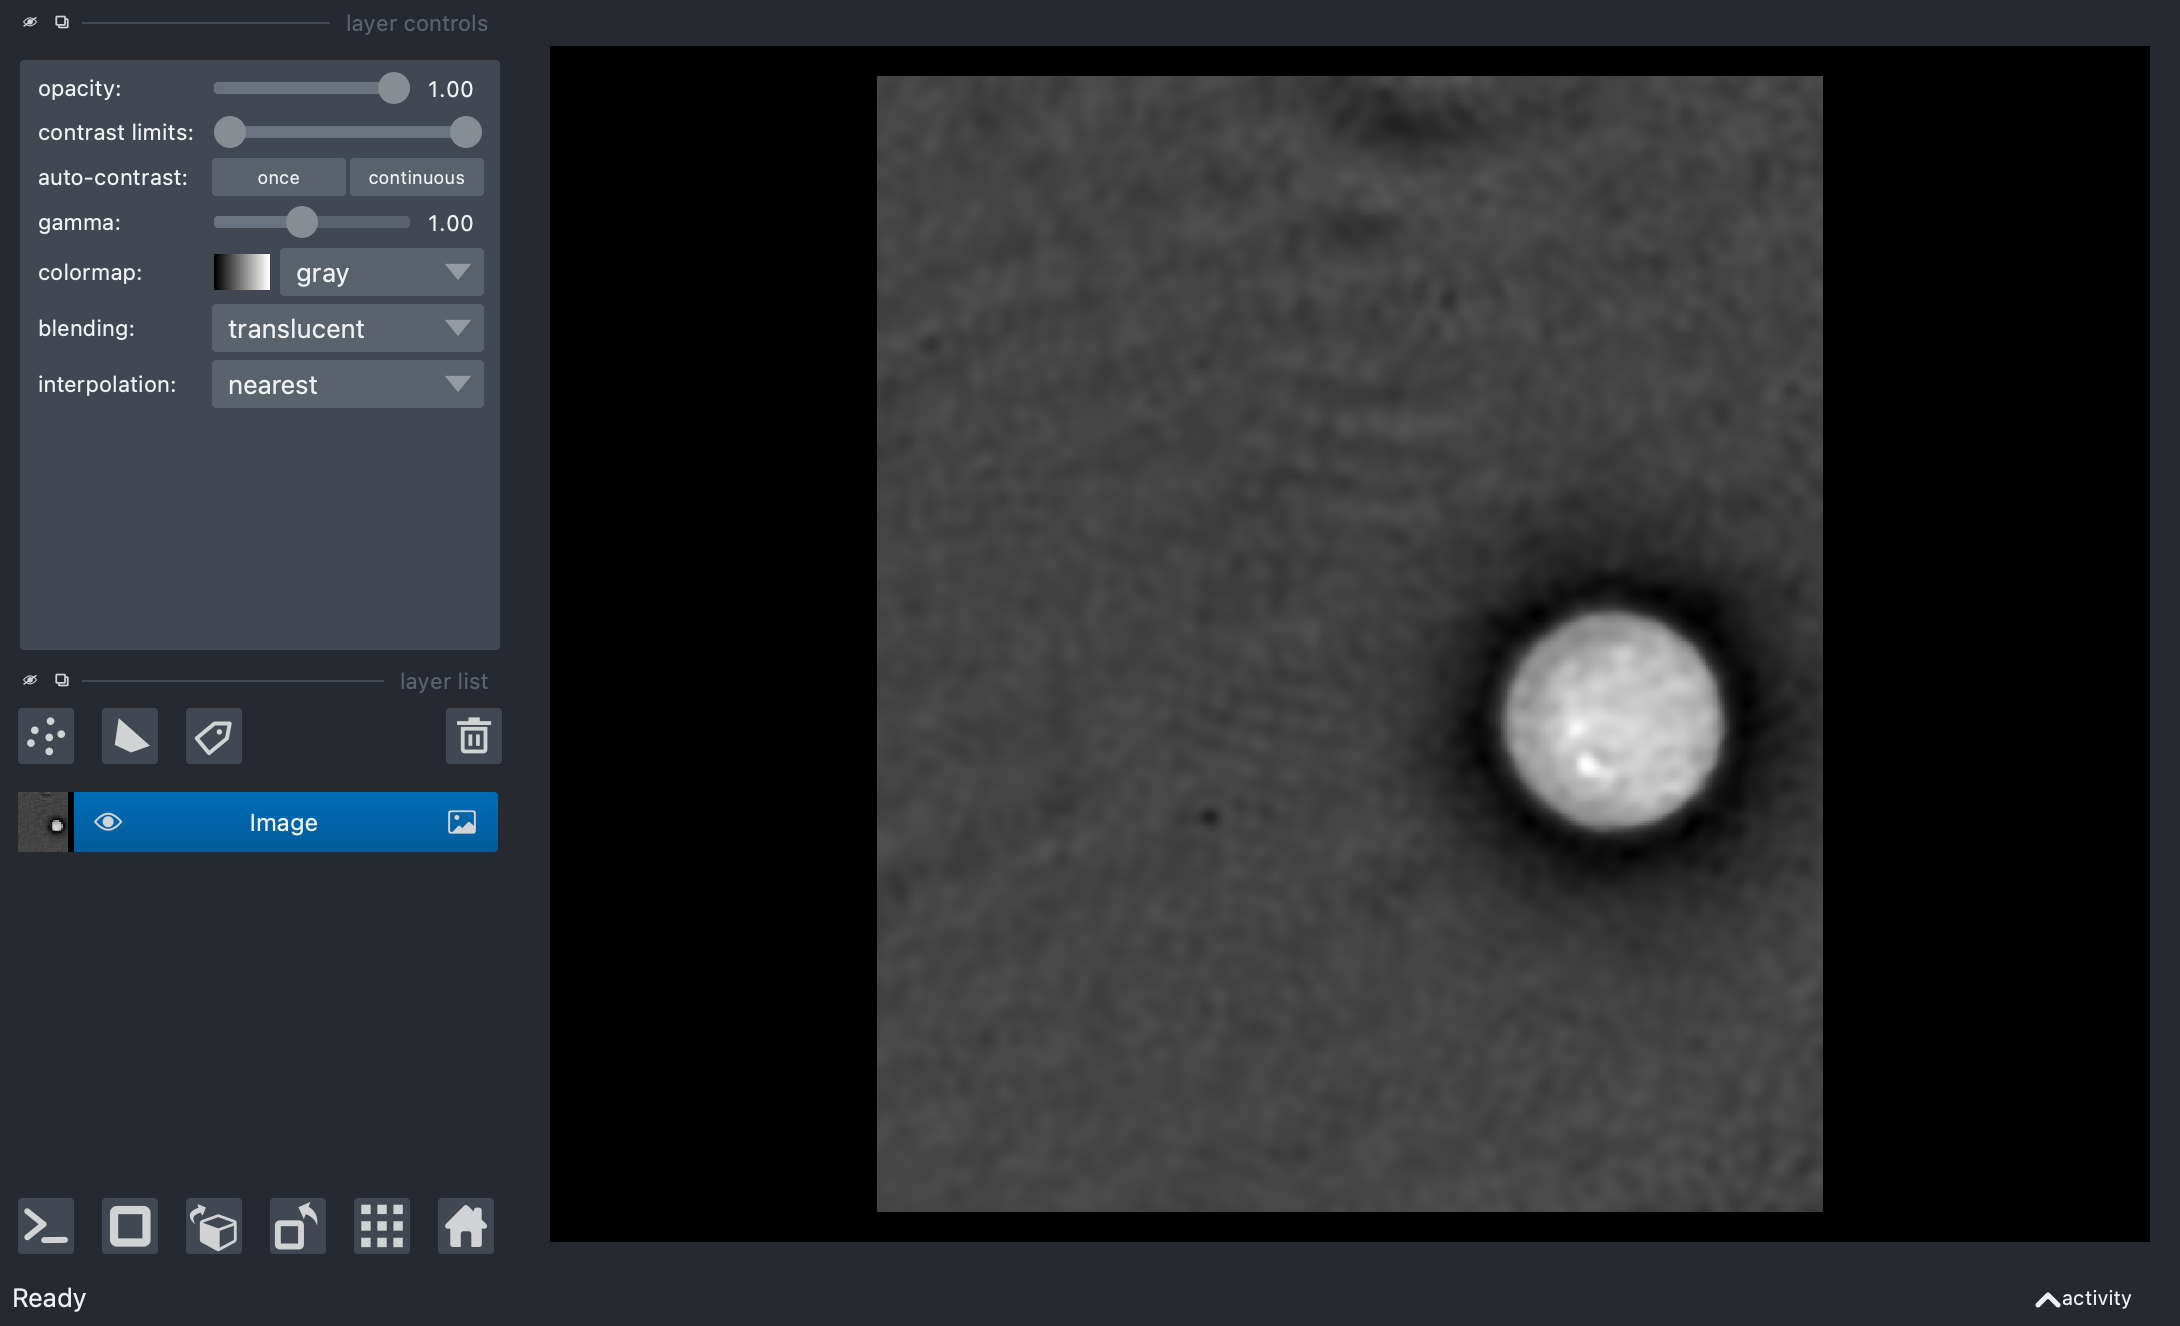

In [7]:
import napari
from napari.utils import nbscreenshot

viewer = napari.Viewer()

from skimage import data
viewer.add_image(data.cell(), name='cell')
nbscreenshot(viewer)

### Image display adjustment

The layer control panel at the upper left of napari viewer allows you adjust contrast, colormap etc. These settings affect the visualization, but do not affect the underlying data.

To change the image display through [API](https://napari.org/api/stable/napari.layers.Image.html), in IPython console, type

```python
viewer.layers['cell'].colormap = "red"
```

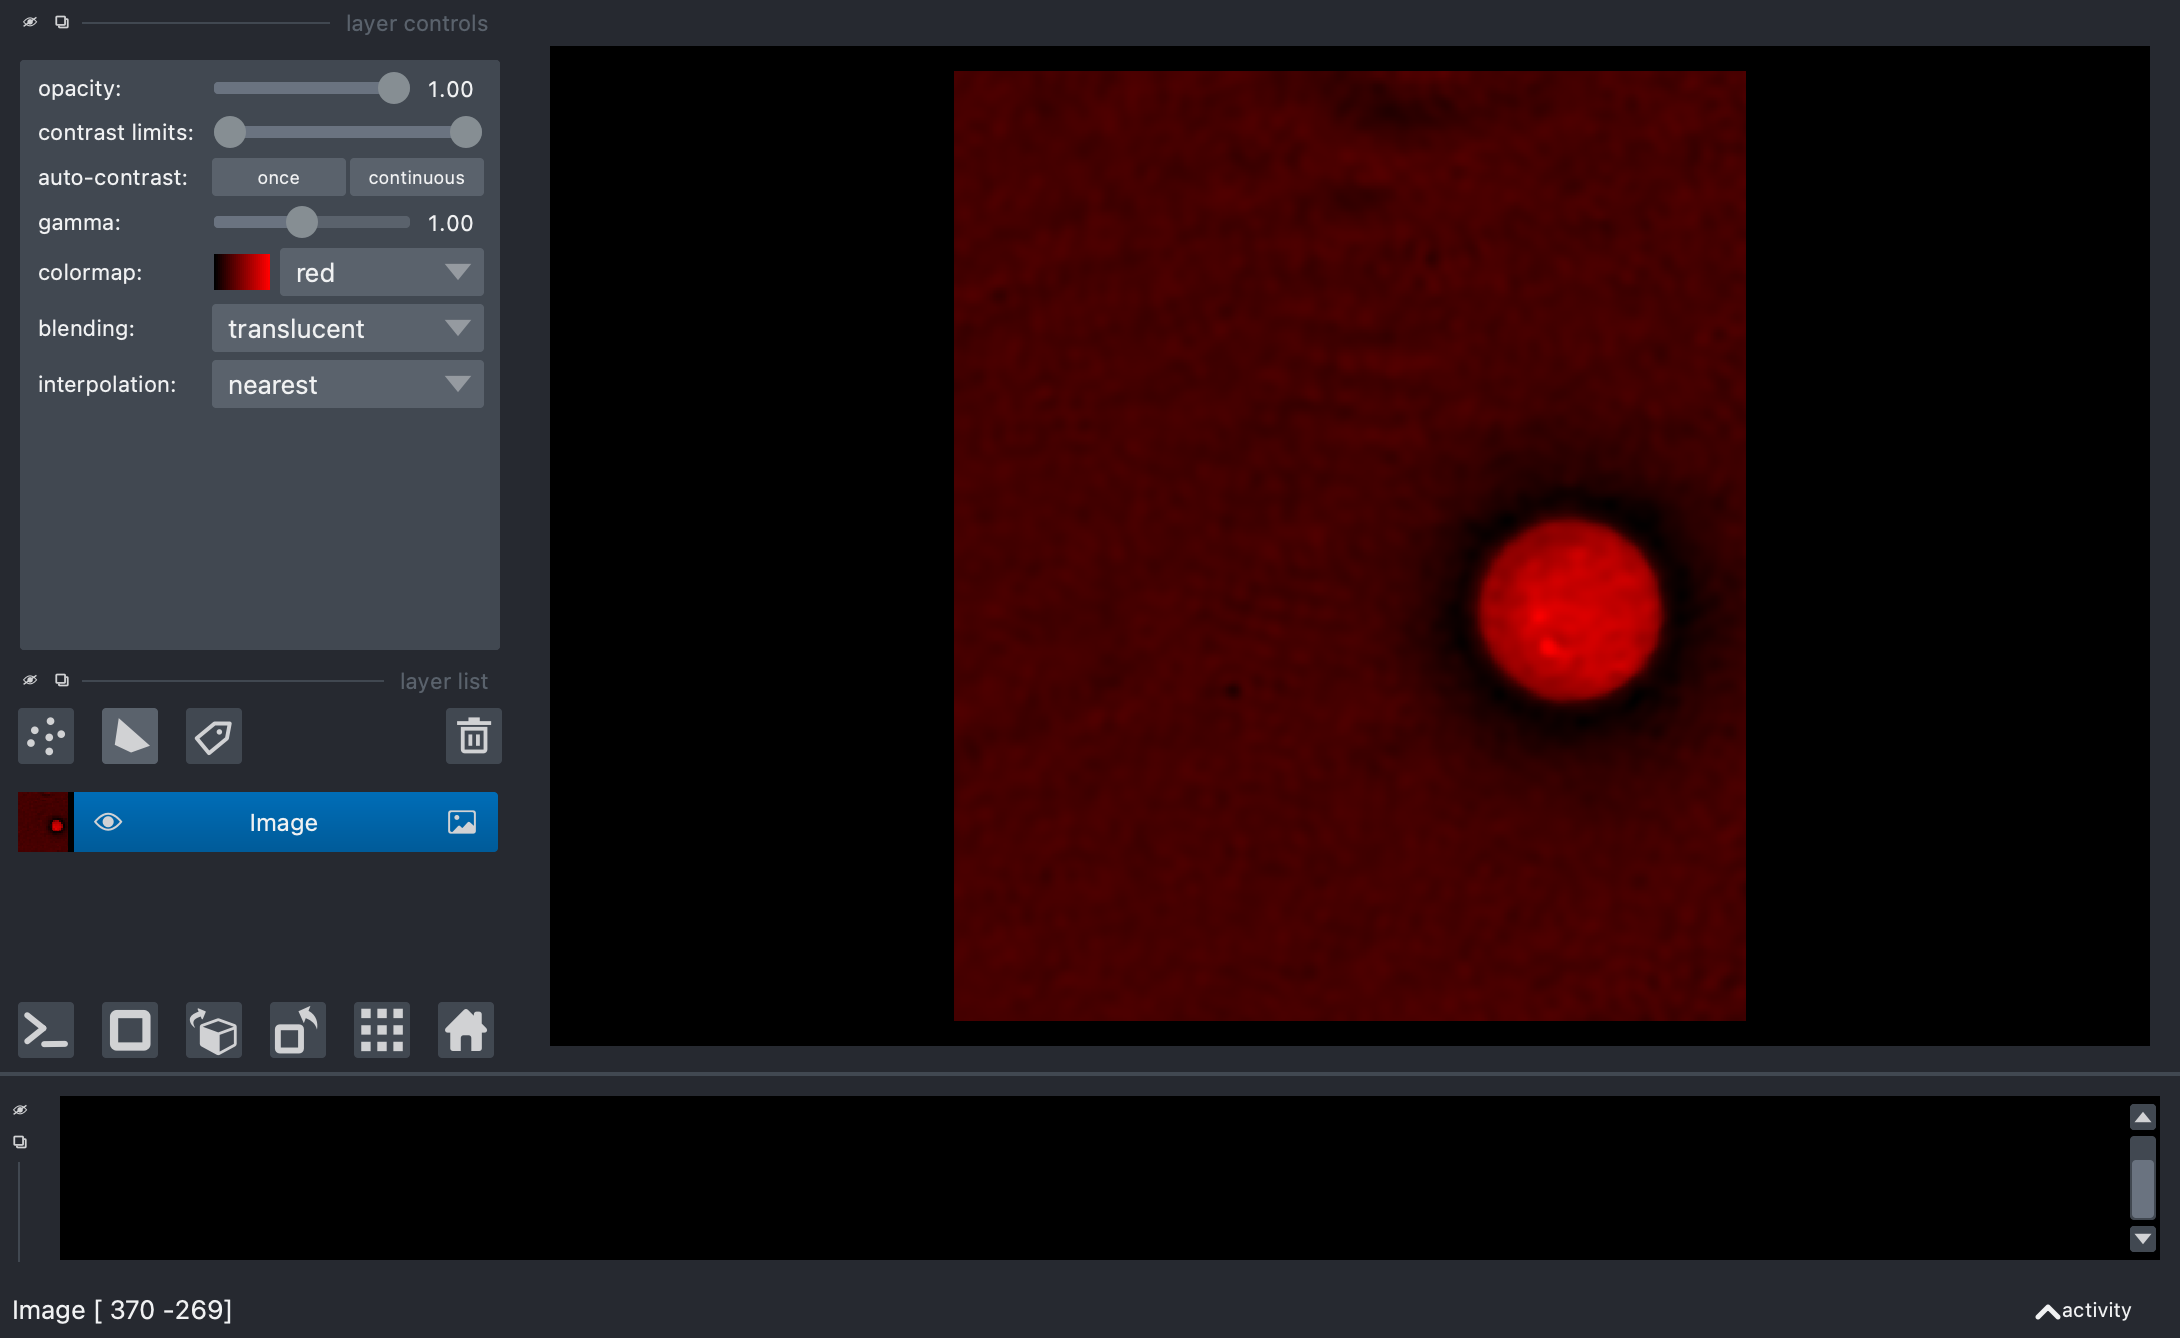

In [8]:
viewer.layers['cell'].colormap = "red"
nbscreenshot(viewer)

### Manually label the cell

To measure the area of the cell, we can use Labels layer and manually "paint" the cell.
The labels layer allows you to record the segmentation result by assigning background = 0, and each object with 

## Get image info

Image dimension <br>
voxel size and time interval <br>

In [ ]:
print("image dimension in (z,y,x):", viewer.layers['nuclei'].data.shape)
print("image voxel size for (z,y,x):", viewer.layers['nuclei'].scale)

## File saving

Default or recommended file formats for each layer type:
???

````{tabbed} napari in code

```python
napari.save_layers(path, layers)
```

````

````{tabbed} napari in GUI gif
place holder for file saving gif
````

In [ ]:
viewer.close()

### FAQ

Q: Can I have someone come teach napari to my group? 
Q: What if the plugin doesn't work with your image? 